# Echonix demonstration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from echonix import ek60, echogram, imaging

## Read a RAW file as Sv

In [2]:
filename = r'../data/ek60/krill_swarm_20091215/JR230-D20091215-T121917.raw'
frequency = 38000
Sv38, r = ek60.raw_to_sv(filename, frequency)

In [3]:
Sv38.shape, r

((572, 3782), 699.6326382335974)

572 pings, 3782 samples to a range of 699 metres

## The first ping

In [4]:
Sv38[0]

array([ 11.51785868,  19.23175232,  19.32942241, ..., -88.42997182,
       -76.84147539, -82.82090197])

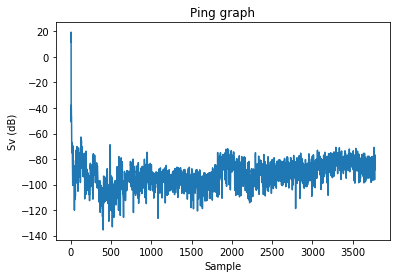

In [5]:
plt.plot(Sv38[0])
plt.ylabel('Sv (dB)')
plt.xlabel('Sample')
plt.title('Ping graph')
plt.show()

## Sv data is just an array

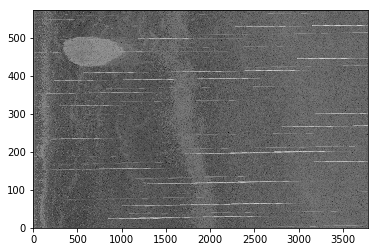

In [6]:
plt.pcolormesh(Sv38, cmap=plt.cm.gray)
plt.show()

Transpose and invert the y-axis for something more like an echogram ..

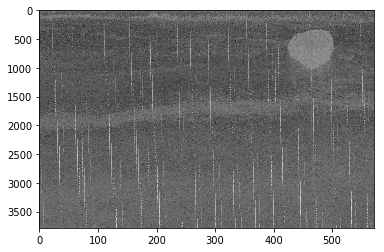

In [7]:
plt.pcolormesh(Sv38.transpose(), cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

Zoom in by using a subset of the array ..

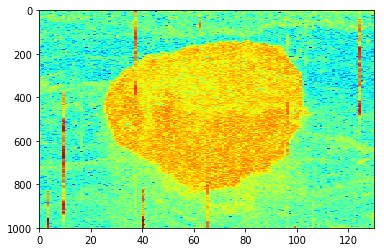

In [8]:
plt.pcolormesh(Sv38.transpose()[200:1200, 400:530], cmap=plt.cm.jet)
plt.gca().invert_yaxis()
plt.show()

## Simple noise spike removal

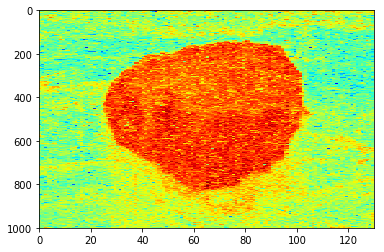

In [9]:
m, n = Sv38.shape

result = np.copy(Sv38)
for i in range(1, m-1):
    for j in range(0, n):
        a = Sv38[i-1,j]
        b = Sv38[i,j]
        c = Sv38[i+1,j]
        d = 10
        if (b - a > d) & (b -c > d):
            result[i,j] = (a + c) /2

plt.pcolormesh(result.transpose()[200:1200, 400:530], cmap=plt.cm.jet)
plt.gca().invert_yaxis()
plt.show()        

## dB differencing

In [10]:
Sv120, r = ek60.raw_to_sv(filename, 120000)
Sv200, r = ek60.raw_to_sv(filename, 200000)

In [11]:
Sv120_38 = Sv120 - Sv38
Sv200_120 = Sv200 - Sv120

In [12]:
a, b, c, d = 0.36555956,  14.262018, -5.3327911,  3.9229028 

In [13]:
mask = (a < Sv120_38) & (Sv120_38 < b) & (c < Sv200_120) & (Sv200_120 < d)

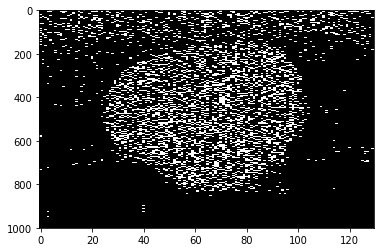

In [14]:
plt.imshow(mask.transpose()[200:1200, 400:530], cmap=plt.cm.gray, aspect='auto')
plt.show()

## A proper echogram

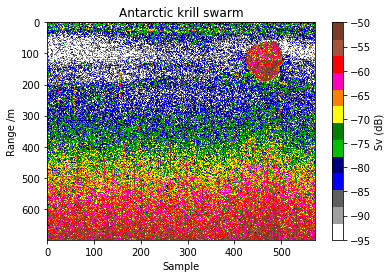

In [15]:
echogram.egshow(Sv120, max = -50, min = -95, range=r)

plt.title('Antarctic krill swarm')
cbar = plt.colorbar()
cbar.set_label('Sv (dB)', rotation=90)

plt.xlabel('Sample')
plt.ylabel('Range /m')
            
plt.show()

## Composite echogram

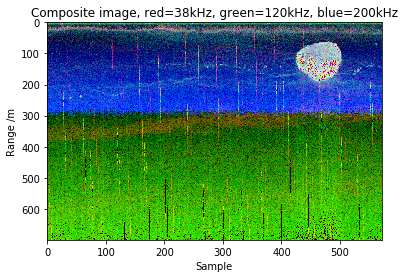

In [18]:
im = imaging.composite(Sv38, Sv120, Sv200, min = -95, max = -50)

echogram.imshow(im, range=r)
plt.title('Composite image, red=38kHz, green=120kHz, blue=200kHz')
plt.xlabel('Sample')
plt.ylabel('Range /m')
plt.show()